In [1]:
#As I was browsing around, I found some useful examples here:
#https://towardsdatascience.com/scikit-learn-decision-trees-explained-803f3812290d
#https://medium.com/@rnbrown/creating-and-visualizing-decision-trees-with-python-f8e8fa394176

import pandas as pd
import sklearn.tree
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics 
import matplotlib.pyplot as plt

In [2]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
from sklearn.tree import export_graphviz

In [3]:
Train = pd.read_csv('HPTrainSet.csv', index_col = 0)
Test = pd.read_csv('HPTestSet.csv', index_col = 0)

In [4]:
Train.head()

,S. Hab Zone Max (AU),S. Mass (SU),S. Size from Planet (deg),P. Habitable
0,0.039,0.06,0.0346,0
1,1.615,0.97,0.6145,1
2,0.077,0.16,1.9856,1
3,1.846,1.01,29.5773,0
4,0.930,0.76,7.7777,0


In [5]:
Xtrain = Train.drop(['P. Habitable'], axis=1)

In [6]:
ytrain = Train['P. Habitable']

In [7]:
Xtest = Test.drop(['P. Habitable'], axis=1)

In [8]:
ytest = Test['P. Habitable']

In [9]:
ytest

0    0
1    1
2    1
3    0
4    1
5    1
Name: P. Habitable, dtype: int64

In [10]:
model = DecisionTreeClassifier(random_state=3)
model.fit(Xtrain,ytrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=3,
            splitter='best')

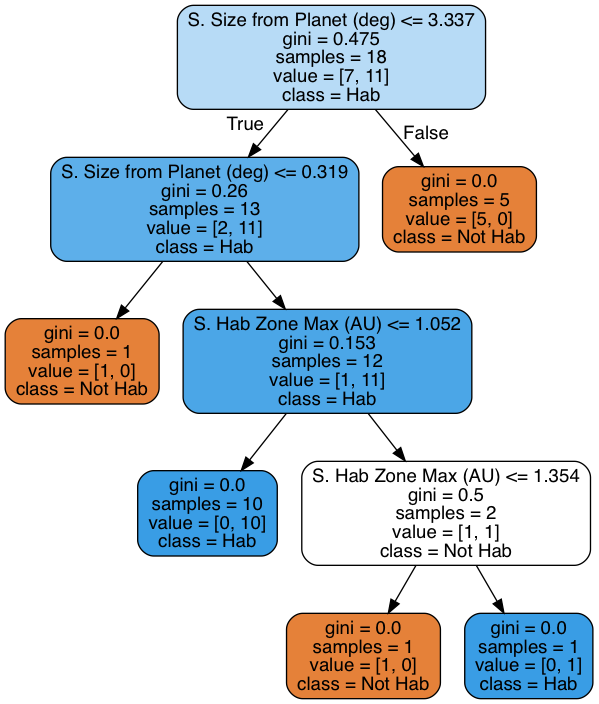

In [11]:
# The features are always randomly permuted at each split. 
# Therefore, the best found split may vary, even with the same training data 
# and max_features=n_features, if the improvement of the criterion is identical 
# for several splits enumerated during the search of the best split. 
# To obtain a deterministic behaviour during fitting, random_state has to be fixed.

dot_data = StringIO()
export_graphviz(
            model,
            out_file =  dot_data,
            feature_names = list(Xtrain.columns),
            class_names = ['Not Hab','Hab'],
            filled = True,
rounded = True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

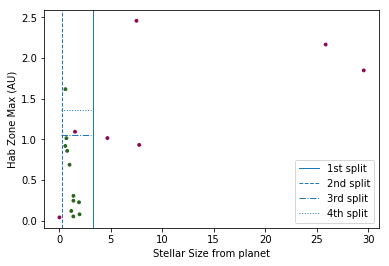

In [17]:
plt.scatter(Xtrain['S. Size from Planet (deg)'], Xtrain['S. Hab Zone Max (AU)'], \
            c = ytrain, s =8, label = None, cmap = 'PiYG')
plt.xlabel('Stellar Size from planet')
plt.ylabel('Hab Zone Max (AU)');
plt.axvline(x=3.337, linewidth =1, label = '1st split')
plt.axvline(x=0.319, linewidth =1, ls = '--', label = '2nd split')
plt.axhline(y=1.052, linewidth =1, ls = '-.', xmin = 0.05, xmax=0.14, label = '3rd split')
plt.axhline(y=1.354, linewidth =1, ls = ':', xmin = 0.05, xmax=0.14, label = '4th split')
plt.legend();

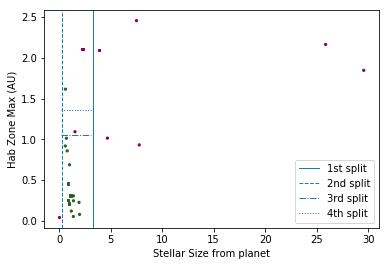

In [18]:
plt.scatter(Xtrain['S. Size from Planet (deg)'], Xtrain['S. Hab Zone Max (AU)'], \
            c = ytrain, s =5, label = None, cmap = 'PiYG')
plt.scatter(Xtest['S. Size from Planet (deg)'], Xtest['S. Hab Zone Max (AU)'], \
            c = ytest, s =5, label = None, marker = 's', cmap = 'PiYG')
plt.xlabel('Stellar Size from planet')
plt.ylabel('Hab Zone Max (AU)');
plt.axvline(x=3.337, linewidth =1, label = '1st split')
plt.axvline(x=0.319, linewidth =1, ls = '--', label = '2nd split')
plt.axhline(y=1.052, linewidth =1, ls = '-.', xmin = 0.05, xmax=0.14, label = '3rd split')
plt.axhline(y=1.354, linewidth =1, ls = ':', xmin = 0.05, xmax=0.14, label = '4th split')
plt.legend();

In [19]:
print(metrics.accuracy_score(ytrain, model.predict(Xtrain)))
print(metrics.accuracy_score(model.predict(Xtest),ytest))

1.0
0.8333333333333334


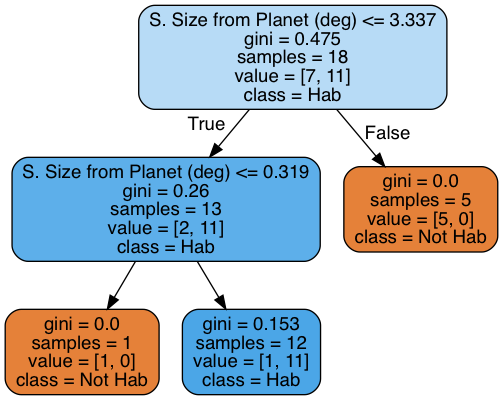

In [20]:
model2 = DecisionTreeClassifier(max_depth=2, random_state=3)
model2.fit(Xtrain,ytrain)
dot_data = StringIO()
export_graphviz(
            model2,
            out_file =  dot_data,
            feature_names = list(Xtrain.columns),
            class_names = ['Not Hab','Hab'],
            filled = True,
rounded = True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [21]:
metrics.accuracy_score(ytrain, model2.predict(Xtrain))

0.9444444444444444

In [22]:
metrics.accuracy_score(ytest, model2.predict(Xtest))

0.8333333333333334